# Credit Risk Analysis

## Import packages

1. `sys`: System-specific parameters and functions.
2. `reload` (from `imp`): Reload previously imported modules.
3. `helper_functions`: Objects with all the functions.

In [1]:
import sys

sys.path.append("..")

from imp import reload
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from helper_functions import data_utils, preprocessing, ml_model_set, evaluation_set
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
from sklearn.linear_model import LogisticRegression

/tmp/ipykernel_45842/3872011942.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


NameError: name 'Path' is not defined

## Load normalized data set


In this notebook, we are going to encode a previously normalized `dataset` followed by the creation of the `ML` model.

In [2]:
app_normalized = data_utils.get_normalized_model()
app_normalized['TARGET_LABEL_BAD=1'] = app_normalized.pop('TARGET_LABEL_BAD=1')
app_normalized = preprocessing.categorical_columns(app_normalized)

In [3]:
app_normalized.head()

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,COMPANY,...,PRODUCT,AGE,HAS_DEPENDANTS,HAS_RESIDENCE,MONTHLY_INCOMES_TOT,HAS_CARDS,HAS_BANKING_ACCOUNTS,HAS_PERSONAL_ASSETS,HAS_CARS,TARGET_LABEL_BAD=1
0,1_14,Web,F,other,1,RN,Y,>_12,1,N,...,1,26_35,True,True,[650_1320],True,False,False,False,1
1,15_30,Carga,F,married,0,RJ,Y,0_6,1,Y,...,1,26_35,False,True,[650_1320],False,False,False,False,1
2,1_14,Web,F,married,0,RN,Y,>_12,1,N,...,1,26_35,False,True,[0_650],False,False,False,False,0
3,15_30,Web,F,married,0,PE,N,>_12,1,N,...,1,>_60,False,False,[0_650],False,False,False,False,0
4,1_14,Web,M,married,0,RJ,Y,6_12,1,N,...,1,46_60,False,True,[650_1320],False,False,False,False,1


In [4]:
print(app_normalized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49935 entries, 0 to 49934
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   PAYMENT_DAY                  49935 non-null  category
 1   APPLICATION_SUBMISSION_TYPE  49935 non-null  category
 2   SEX                          49935 non-null  category
 3   MARITAL_STATUS               49935 non-null  category
 4   QUANT_DEPENDANTS             49935 non-null  category
 5   RESIDENCIAL_STATE            49935 non-null  category
 6   FLAG_RESIDENCIAL_PHONE       49935 non-null  category
 7   MONTHS_IN_RESIDENCE          49935 non-null  category
 8   FLAG_EMAIL                   49935 non-null  category
 9   COMPANY                      49935 non-null  category
 10  FLAG_PROFESSIONAL_PHONE      49935 non-null  category
 11  PRODUCT                      49935 non-null  category
 12  AGE                          49935 non-null  category
 13  H

### Encoding

- we encode data to convert categorical variables into numerical values so that they can be easily fitted to a machine learning model. 

- Pandas has its own function for encoding:
    - `get_dummies`: It creates a new binary column for each unique value in the categorical variable, where a value of 1 indicates that the original column contained that value, and 0 indicates that it did not


* Some of the encoding techniques offered by category_encoders are:
    - `One-Hot Encoding:` Encoding using the One-Hot Encoding method.
    - `Ordinal Encoding:` Ordinal encoding, where ordinal labels are assigned to categories.
    - `Binary Encoding:` Base-2 encoding to reduce dimensionality in categorical variables with multiple categories.
    - `BaseN Encoding:` Base-N encoding to reduce dimensionality in categorical variables with multiple categories.
    - `Target Encoding:` Encoding using the target variable to assign values to categories.
    - `CatBoost Encoding:` Specific encoding for working with the CatBoost algorithm.

In [5]:
app_dum = ml_model_set.encoding(app_normalized, get_dummies=True,with_target=True) # True for pandas get_dummies
# app_enc = ml_model.encoding(app_normalized, False) # False for different encoder

In [6]:
app_dum.columns.to_list()[40:]

['PRODUCT_2',
 'PRODUCT_7',
 'AGE_26_35',
 'AGE_36_45',
 'AGE_46_60',
 'AGE_<_18',
 'AGE_>_60',
 'HAS_DEPENDANTS_True',
 'HAS_RESIDENCE_True',
 'MONTHLY_INCOMES_TOT_[1320_3323]',
 'MONTHLY_INCOMES_TOT_[3323_8560]',
 'MONTHLY_INCOMES_TOT_[650_1320]',
 'MONTHLY_INCOMES_TOT_[>8560]',
 'HAS_CARDS_True',
 'HAS_BANKING_ACCOUNTS_True',
 'HAS_PERSONAL_ASSETS_True',
 'HAS_CARS_True',
 'TARGET_LABEL_BAD=1']

#### get accepted samples

In [7]:
X_train, y_train, X_test, y_test, X_val, y_val = data_utils.get_feature(app_dum) 
X_train_reshape, y_train_reshape = data_utils.resampling(X_train, y_train)

In [8]:
logistic_model = LogisticRegression(penalty='l2', solver='sag', multi_class='auto', max_iter=500)

In [9]:
logistic_model.fit(X_train_reshape, y_train_reshape)

LogisticRegression(max_iter=500, solver='sag')

In [10]:
res_clases_val = logistic_model.predict(X_val)

In [11]:
X_val_full = X_val.copy()
X_val_full["class"] = res_clases_val

In [12]:
X_val_full[X_val_full["class"]==0].head(1).T.iloc[50:150,:]

,14675
MONTHLY_INCOMES_TOT_[3323_8560],False
MONTHLY_INCOMES_TOT_[650_1320],False
MONTHLY_INCOMES_TOT_[>8560],False
HAS_CARDS_True,False
HAS_BANKING_ACCOUNTS_True,False
HAS_PERSONAL_ASSETS_True,False
HAS_CARS_True,False
class,0


In [13]:
len(app_dum.columns)

58

In [14]:
reload(ml_model_set)

<module 'helper_functions.ml_model' from '/home/chris/Learning-2023/anyoneai_dir/endproj/credit-risk-analysis/src/notebooks/../helper_functions/ml_model.py'>

Best Score for Logistic Regression:  0.6842585775290826
model score for Logistic Regression: 0.685


Model Performance metrics:
------------------------------
Accuracy: 0.6892960849103835
Precision: 0.7661549888586284
Recall: 0.8360124273942996
F1 Score: 0.7995607518894128

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      7403
           1       0.36      0.27      0.31      2584

    accuracy                           0.69      9987
   macro avg       0.57      0.55      0.55      9987
weighted avg       0.66      0.69      0.67      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  6189  1214
1  1889   695


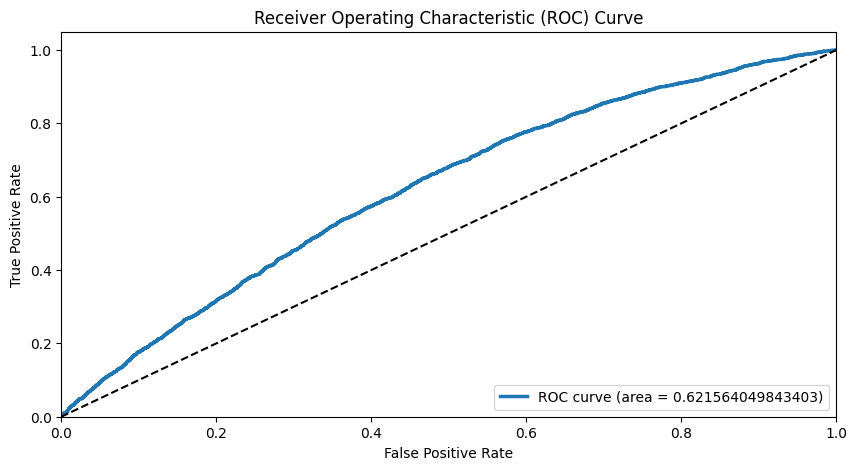

Best Score for Logistic Regression:  0.6842585775290826


In [15]:
# using get_dummies
lr_model_enc = ml_model_set.model_logistic_regression(app_dum, True)

Model Performance metrics:
------------------------------
Accuracy: 0.5519174927405627
Precision: 0.8152454780361758
Recall: 0.5114142915034445
F1 Score: 0.6285382252843031

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.51      0.63      7403
           1       0.32      0.67      0.44      2584

    accuracy                           0.55      9987
   macro avg       0.57      0.59      0.53      9987
weighted avg       0.69      0.55      0.58      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  3786  3617
1   858  1726


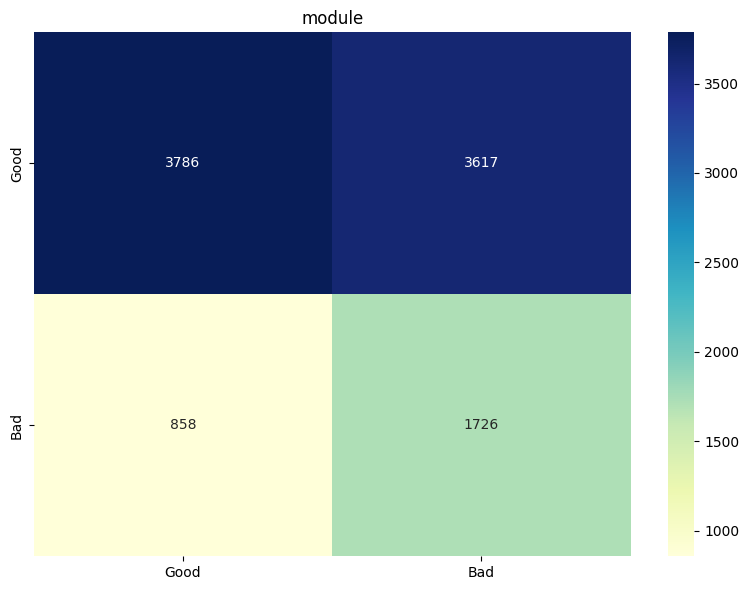

In [16]:

plt.figure(figsize=(8,6))

class_weights = {0:1,1:3}
model = LogisticRegression(C=0.1,max_iter=200,class_weight=class_weights)
model.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = evaluation_set.get_performance(y_pred, y_test)
# cast df data
cm_matrix = pd.DataFrame(
    data=cm, 
    columns=['Good', 'Bad'], 
    index=['Good', 'Bad']
)
# plot confusion matrix
sns.heatmap(data=cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title(ml_model_set.__class__.__name__)
plt.tight_layout()
plt.show()

In [17]:
lr_model_enc.best_params_

{'C': 0.1, 'class_weight': {0: 1, 1: 2}}

In [18]:
#ml_model.model_catboost_classifier(app_dum, True)

### Comparing different models

Model Performance metrics:
------------------------------
Accuracy: 0.6892960849103835
Precision: 0.7661549888586284
Recall: 0.8360124273942996
F1 Score: 0.7995607518894128

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      7403
           1       0.36      0.27      0.31      2584

    accuracy                           0.69      9987
   macro avg       0.57      0.55      0.55      9987
weighted avg       0.66      0.69      0.67      9987

LogisticRegression(C=0.1, class_weight={0: 1, 1: 2}, max_iter=200)


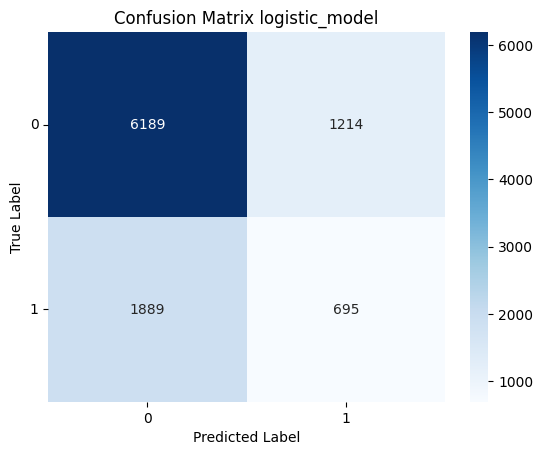

Model Performance metrics:
------------------------------
Accuracy: 0.6772804646039852
Precision: 0.7586633663366337
Recall: 0.8280426853978117
F1 Score: 0.7918362074533359

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      7403
           1       0.33      0.25      0.28      2584

    accuracy                           0.68      9987
   macro avg       0.55      0.54      0.54      9987
weighted avg       0.65      0.68      0.66      9987

GaussianNB()


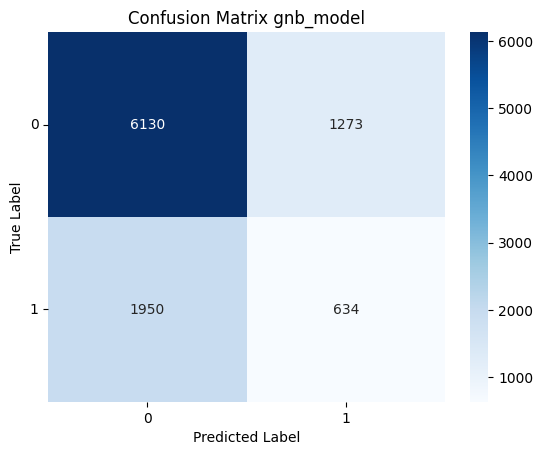

Model Performance metrics:
------------------------------
Accuracy: 0.6834885350956243
Precision: 0.7692307692307693
Recall: 0.8185870593002836
F1 Score: 0.7931418100909626

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      7403
           1       0.36      0.30      0.33      2584

    accuracy                           0.68      9987
   macro avg       0.57      0.56      0.56      9987
weighted avg       0.66      0.68      0.67      9987



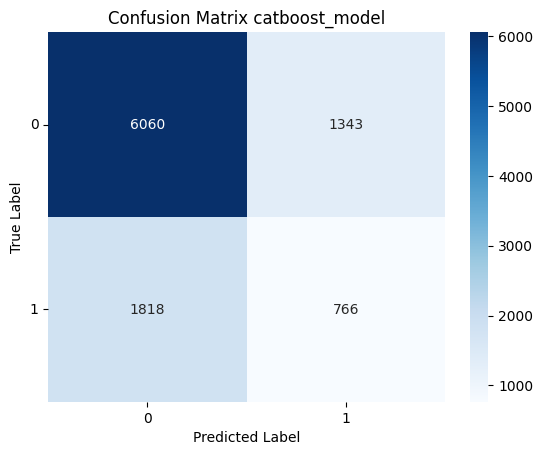

Model Performance metrics:
------------------------------
Accuracy: 0.6152998898568138
Precision: 0.7510929347059653
Recall: 0.7194380656490612
F1 Score: 0.7349247964675037

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      7403
           1       0.28      0.32      0.30      2584

    accuracy                           0.62      9987
   macro avg       0.52      0.52      0.52      9987
weighted avg       0.63      0.62      0.62      9987

DecisionTreeClassifier(class_weight={0: 1, 1: 2})


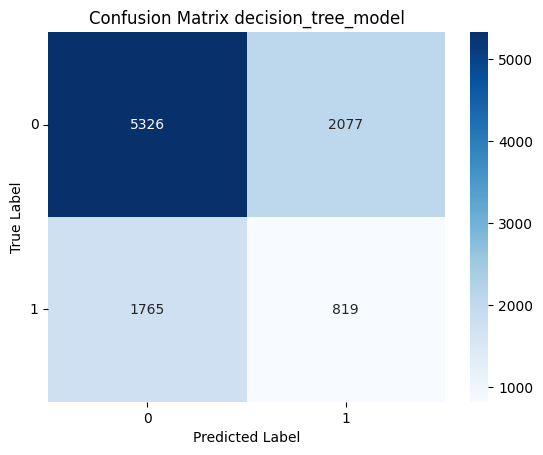

Model Performance metrics:
------------------------------
Accuracy: 0.7061179533393411
Precision: 0.7494974313156131
Recall: 0.9065243820072943
F1 Score: 0.820566118481384

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      7403
           1       0.33      0.13      0.19      2584

    accuracy                           0.71      9987
   macro avg       0.54      0.52      0.50      9987
weighted avg       0.64      0.71      0.66      9987

RandomForestClassifier(class_weight={0: 1, 1: 2}, random_state=42)


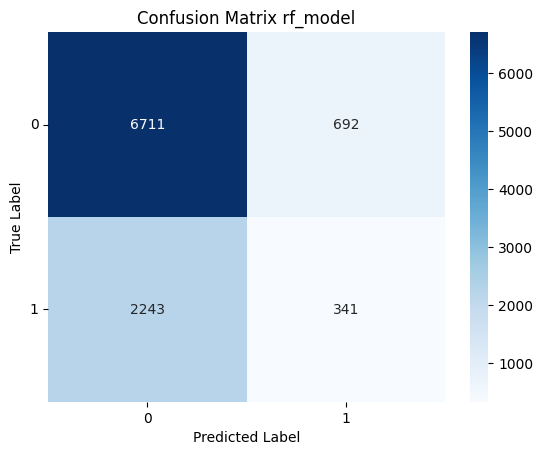

                 Model  Accuracy  Precision    Recall       F-1       ROC
0       catboost_model  0.683489   0.769231  0.818587  0.793142  0.387520
1       logistic_model  0.689296   0.766155  0.836012  0.799561  0.378436
2            gnb_model  0.677280   0.758663  0.828043  0.791836  0.417071
3  decision_tree_model  0.615300   0.751093  0.719438  0.734925  0.483770
4             rf_model  0.706118   0.749497  0.906524  0.820566  0.426543
best model with more precision is: CatBoostClassifier


In [19]:
reload(preprocessing)
reload(ml_model_set)
best_model = ml_model_set.basic_models(app_dum,save_model=False)